In [1]:
# Import some libraries
import os

import numpy as np

import pandas as pd

import cv2

import matplotlib.pyplot as plt

from deepface import DeepFace

%matplotlib inline

# %matplotlib notebook

Directory  /home/dai /.deepface created
Directory  /home/dai /.deepface/weights created


In [2]:
# Some basic parameters
inpDir = '../input'
dataDir = 'face_recog/arc_faces'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# rgb for blue color
RGB_BLUE = (15, 82, 186)

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = 'brg'

plt.rcParams.update(params)

In [3]:
def fn_read_image(fileName):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 format
        rgbIm: image in RGB format
    
    '''
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        # convert to RGB image
        rgbIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rgbIm

    
def fn_plot_one_img(im):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im)
    plt.axis('off')
        
def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols)
    
    for i in range(nCols):
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        axes[i].set_title(im_lst[i]['name'])

        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);

                
    plt.tight_layout()

### DeepFaces

Deepface is a hybrid face recognition package. It currently wraps many state-of-the-art face recognition models: `VGG-Face` , `Google FaceNet`, `OpenFace`, `Facebook DeepFace`, `DeepID`, `ArcFace`, `Dlib and SFace`. The default configuration uses `VGG-Face` model.

Needs following libraries.

> `pip install deepface`

> `pip install cmake`

> `pip install dlib` 

**Note** : expect substantial download of models


### Face Detectors - Demo

Face detection and alignment are important early stages of a modern face recognition pipeline. Experiments show that just alignment increases the face recognition accuracy almost 1%. `OpenCV`, `SSD`, `Dlib`, `MTCNN`, `RetinaFace` and `MediaPipe` detectors are wrapped in deepface.


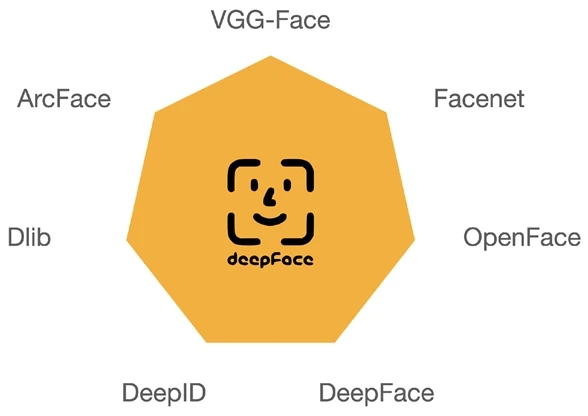


In [4]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

In [5]:
img1Name = 'tom158337153.jpg'
img2Name = 'tom-cruise2.jpg'
img3Name = 'tom-cruise1.jpg'
img4Name = 'charlie-sheen.jpg'

img1Path = os.path.join(inpDir, dataDir, img1Name)
img2Path = os.path.join(inpDir, dataDir, img2Name)
img3Path = os.path.join(inpDir, dataDir, img3Name)
img4Path = os.path.join(inpDir, dataDir, img4Name)

In [6]:
_, img1 = fn_read_image(img1Name)
_, img2 = fn_read_image(img2Name)

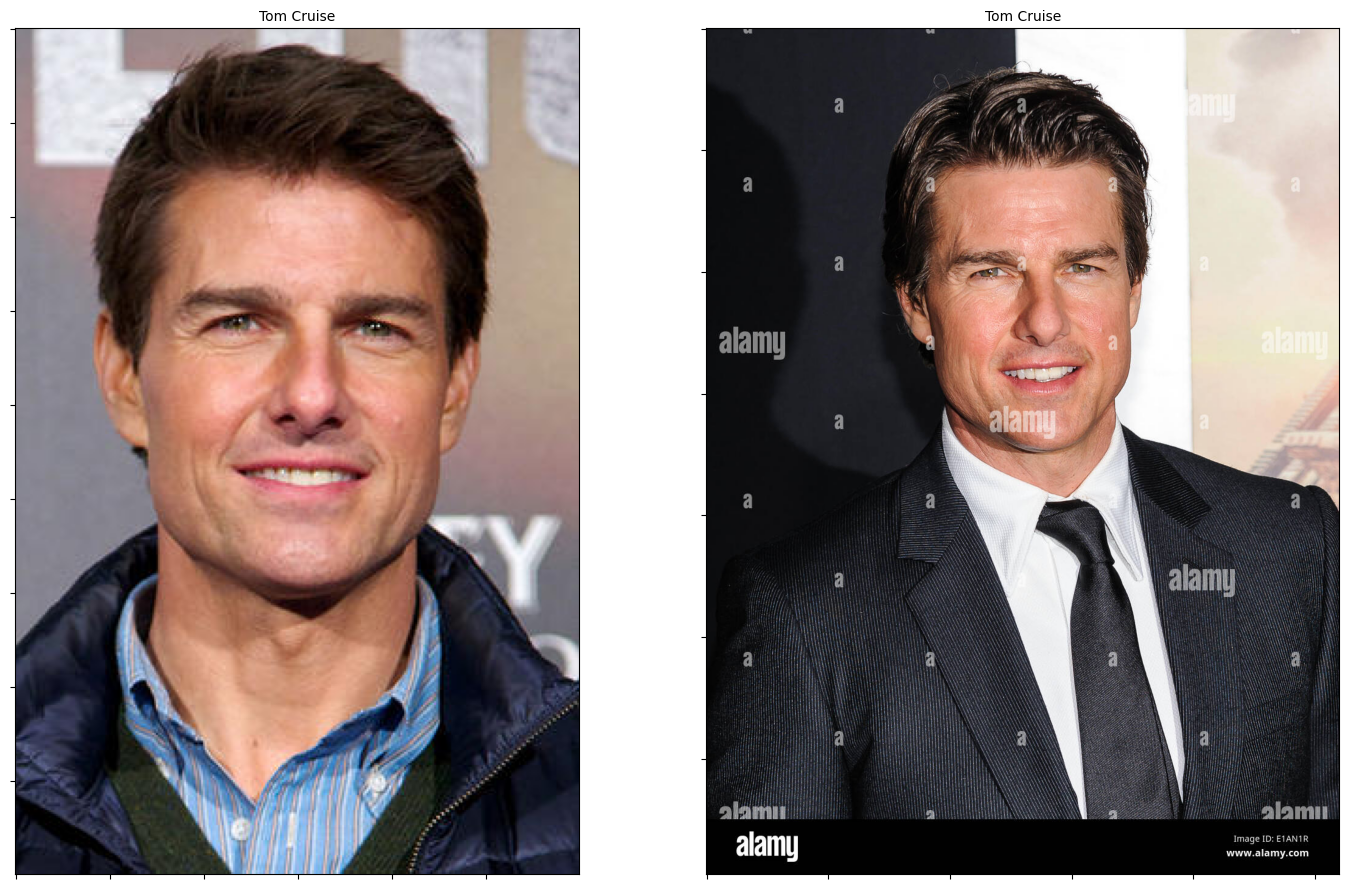

In [7]:
img_lst = [{'img': img1, 'name': 'Tom Cruise','cmap' : CMAP},
           {'img': img2, 'name': 'Tom Cruise','cmap' : CMAP}]

fn_plot_images(img_lst)

In [8]:
DeepFace.verify(img1Path, img2Path, model_name="ArcFace", detector_backend='opencv', distance_metric='euclidean')

arcface_weights.h5  will be downloaded to  /home/dai/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /home/dai/.deepface/weights/arcface_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 137M/137M [00:20<00:00, 6.57MB/s]


1/1 [==============================] - 0s 93ms/step


{'verified': True,
 'distance': 3.1206119125027554,
 'threshold': 4.15,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean'}

In [9]:
#face verification
result = DeepFace.verify(img1_path = img1Path,
                         img2_path = img2Path, 
                         model_name = models[0])
result

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /home/dai/.deepface/weights/vgg_face_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 580M/580M [01:57<00:00, 4.95MB/s]


1/1 [==============================] - 0s 265ms/step


{'verified': True,
 'distance': 0.08232011051604804,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [10]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[1])
result

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /home/dai/.deepface/weights/facenet_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:03<00:00, 23.4MB/s]


1/1 [==============================] - 0s 64ms/step


{'verified': True,
 'distance': 0.19733147337177603,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [11]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[2])
result

facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /home/dai/.deepface/weights/facenet512_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95.0M/95.0M [00:06<00:00, 13.7MB/s]


1/1 [==============================] - 0s 68ms/step


{'verified': True,
 'distance': 0.17193075803136904,
 'threshold': 0.3,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [12]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[3])
result

openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /home/dai/.deepface/weights/openface_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15.3M/15.3M [00:02<00:00, 5.59MB/s]


1/1 [==============================] - 0s 30ms/step


{'verified': False,
 'distance': 0.10630337441049131,
 'threshold': 0.1,
 'model': 'OpenFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [13]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[4])
result

VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /home/dai/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511M/511M [00:55<00:00, 9.22MB/s]


1/1 [==============================] - 0s 58ms/step


{'verified': True,
 'distance': 0.1981907862242388,
 'threshold': 0.23,
 'model': 'DeepFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [14]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[5])
result

deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /home/dai/.deepface/weights/deepid_keras_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.61M/1.61M [00:00<00:00, 7.36MB/s]


1/1 [==============================] - 0s 21ms/step


{'verified': False,
 'distance': 0.024715653406496396,
 'threshold': 0.015,
 'model': 'DeepID',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [15]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[6])
result

1/1 [==============================] - 0s 99ms/step


{'verified': True,
 'distance': 0.30529915735495794,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [16]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[7])
result

dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /home/dai/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21.4M/21.4M [00:18<00:00, 1.13MB/s]


{'verified': True,
 'distance': 0.022778576239197212,
 'threshold': 0.07,
 'model': 'Dlib',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [17]:
#face verification
result = DeepFace.verify(img1_path = img1Path, img2_path = img2Path, model_name = models[8])
result

sface weights will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_zoo/raw/master/models/face_recognition_sface/face_recognition_sface_2021dec.onnx
To: /home/dai/.deepface/weights/face_recognition_sface_2021dec.onnx
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38.7M/38.7M [00:01<00:00, 26.6MB/s]


{'verified': True,
 'distance': 0.3051629861316001,
 'threshold': 0.5932763306134152,
 'model': 'SFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

## Facial Attribute Analysis

Deepface also comes with a strong facial attribute analysis module including age, gender, facial expression (including angry, fear, neutral, sad, disgust, happy and surprise) and race (including asian, white, middle eastern, indian, latino and black) predictions.

In [18]:
img5Name = 'tom-cruise1.jpg'

img5Path = os.path.join(inpDir, dataDir, img1Name)

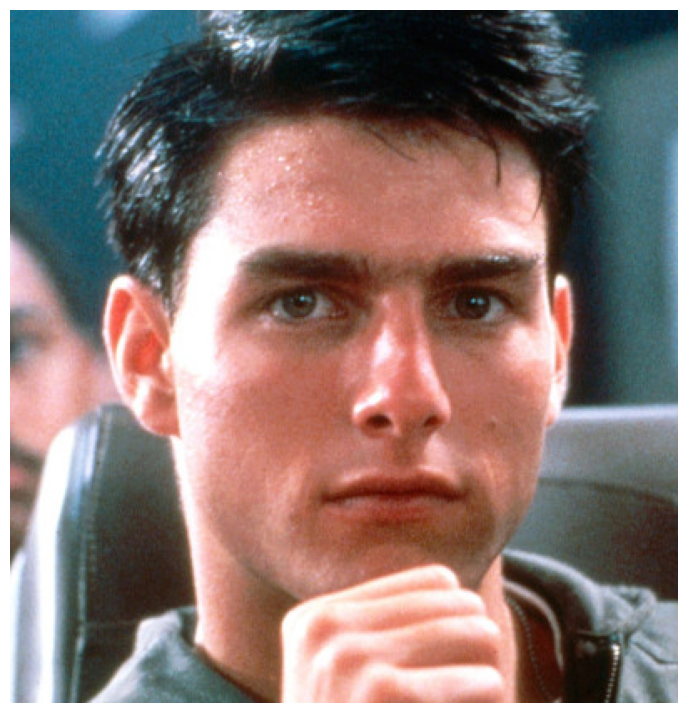

In [19]:
_, img = fn_read_image(img5Name)

fn_plot_one_img(img)

In [20]:
obj = DeepFace.analyze(img_path = img5Path, actions = ['age', 'gender', 'race', 'emotion'])

obj

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /home/dai/.deepface/weights/facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:02<00:00, 2.82MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /home/dai/.deepface/weights/age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 539M/539M [00:41<00:00, 12.9MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /home/dai/.deepface/weights/gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 537M/537M [01:11<00:00, 7.55MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /home/dai/.deepface/weights/race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 537M/537M [01:18<00:00, 6.81MB/s]
Action: age:   0%|                                                                                                                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 1s 884ms/step


Action: gender:  25%|████████████████████████████████████████                                                                                                                        | 1/4 [00:01<00:03,  1.26s/it]

1/1 [==============================] - 0s 429ms/step


Action: race:  50%|█████████████████████████████████████████████████████████████████████████████████                                                                                 | 2/4 [00:01<00:01,  1.26it/s]

1/1 [==============================] - 0s 439ms/step


Action: emotion:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 3/4 [00:02<00:00,  1.54it/s]

1/1 [==============================] - 0s 144ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]


{'age': 25,
 'region': {'x': 58, 'y': 80, 'w': 198, 'h': 198},
 'gender': 'Man',
 'race': {'asian': 5.374437873906235e-10,
  'indian': 1.665571001431554e-10,
  'black': 2.18083693575213e-14,
  'white': 99.99927282333374,
  'middle eastern': 0.0004057841124449624,
  'latino hispanic': 0.0003198014383087866},
 'dominant_race': 'white',
 'emotion': {'angry': 0.000846618109320811,
  'disgust': 3.547315430779737e-08,
  'fear': 0.0007293996966854488,
  'happy': 86.1287108736462,
  'sad': 0.0018197616730139098,
  'surprise': 0.012955616010967107,
  'neutral': 13.854938081201201},
 'dominant_emotion': 'happy'}

### Note on backend

Face recognition models are actually CNN models and they expect standard sized inputs. So, resizing is required before representation. To avoid deformation, deepface adds black padding pixels according to the target size argument after detection and alignment.

`RetinaFace` and `MTCNN` seem to overperform in detection and alignment stages but they are much slower. If the speed of your pipeline is more important, then you should use `opencv` or `ssd`. On the other hand, if you consider the accuracy, then you should use retinaface or mtcnn.

In [28]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

#face verification
obj = DeepFace.verify(img1_path = img5Path, img2_path = img2Path, detector_backend = backends[4])

#face recognition
df = DeepFace.find(img_path = img5Path, db_path = "my_db", detector_backend = backends[4])

#facial analysis
demography = DeepFace.analyze(img_path = img5Path, detector_backend = backends[4])

#face detection and alignment
face = DeepFace.detectFace(img_path = img5Path, target_size = (224, 224), detector_backend = backends[4])


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

## Tech Stack

Face recognition models represent facial images as vector embeddings. The idea behind facial recognition is that vectors should be more similar for same person than different persons. The question is that where and how to store facial embeddings in a large scale system. Herein, deepface offers a represention function to find vector embeddings from facial images.

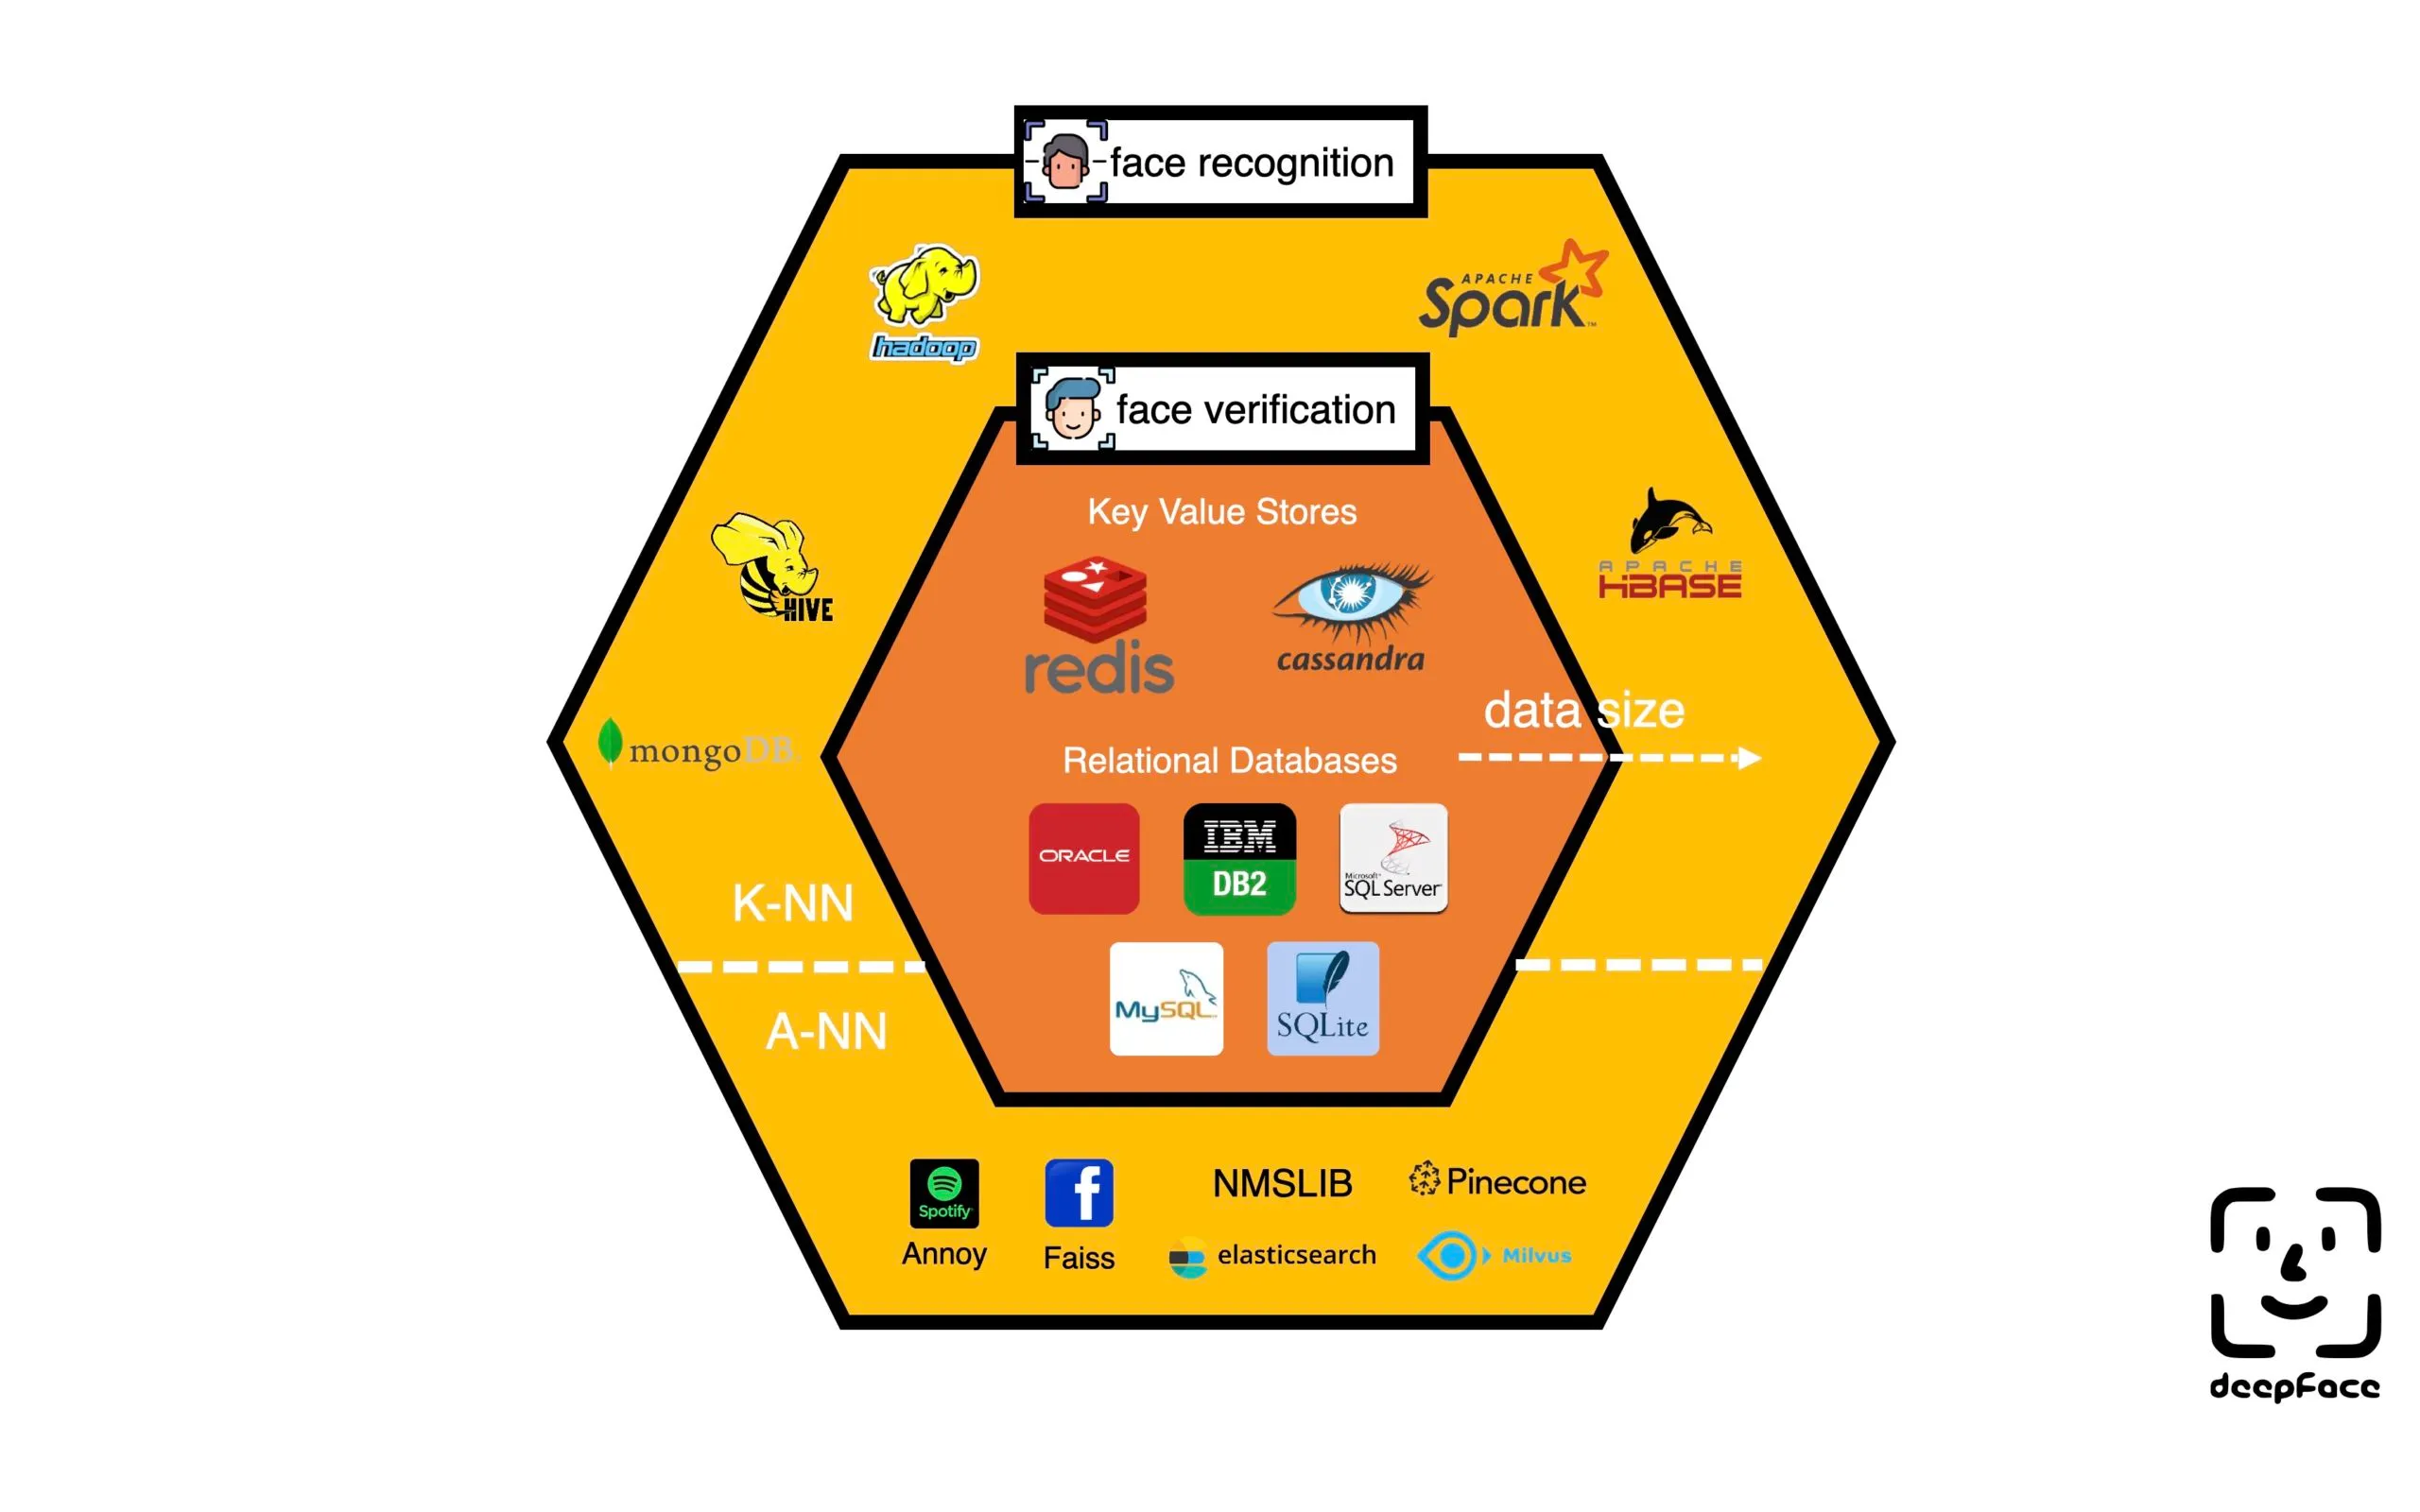

Tech stack is vast to store vector embeddings. To determine the right tool, you should consider your task such as face verification or face recognition, priority such as speed or confidence, and also data size.

In [24]:
embedding = DeepFace.represent(img_path = img5Path, model_name = 'Facenet')

1/1 [==============================] - 0s 65ms/step


In [25]:
embedding

[0.3969409763813019,
 -0.3981616199016571,
 -2.3593549728393555,
 0.30885815620422363,
 -0.5310152769088745,
 0.5070260167121887,
 -1.6528292894363403,
 -0.27519020438194275,
 1.1650006771087646,
 -0.4820422828197479,
 0.1894102692604065,
 -0.12403657287359238,
 0.2797836661338806,
 -0.6133646965026855,
 0.42146503925323486,
 -1.2156188488006592,
 0.32884833216667175,
 -0.9017213582992554,
 -1.8488433361053467,
 -1.020660161972046,
 -0.1992979645729065,
 -0.44956353306770325,
 -0.5790972113609314,
 -0.10644573718309402,
 -1.0279122591018677,
 -0.2427985966205597,
 -0.01932501420378685,
 -0.2723538875579834,
 1.1450355052947998,
 0.8006148934364319,
 -0.21310856938362122,
 0.6673877239227295,
 -0.5795729160308838,
 -0.04169738292694092,
 -0.07061368972063065,
 1.985598087310791,
 -1.502585530281067,
 -0.701698899269104,
 -1.5691237449645996,
 -0.8495244979858398,
 1.5142885446548462,
 -0.45656490325927734,
 -0.21628618240356445,
 -0.7684136033058167,
 -0.020093901082873344,
 -0.57376265